In [1]:
#구글코랩사용시에만 필요함!!

from google.colab import drive
import os

if os.path.exists('/content/gdrive')==False:
    drive.mount('/content/gdrive')
    print('Google Drive is mounted\n')
else:
    print('Google Drive is already mounted\n')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
Google Drive is mounted



In [0]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.io import imread
from skimage.transform import pyramid_reduce, resize

import os, glob

In [3]:
img_list = sorted(glob.glob('/content/gdrive/My Drive/Colab Notebooks/의료/CT_lung_segmention/real_data/2d_images/*.tif'))
mask_list = sorted(glob.glob('/content/gdrive/My Drive/Colab Notebooks/의료/CT_lung_segmention/real_data/2d_masks/*.tif'))

print(len(img_list), len(mask_list))

267 267


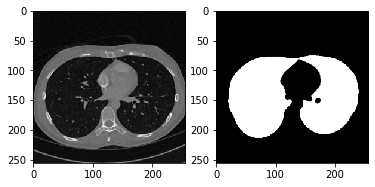

In [0]:
IMG_SIZE = 256

x_data, y_data = np.empty((2, len(img_list), IMG_SIZE, IMG_SIZE, 1), dtype=np.float32)

for i, img_path in enumerate(img_list):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    x_data[i] = img
    
for i, img_path in enumerate(mask_list):
    img = imread(img_path)
    img = resize(img, output_shape=(IMG_SIZE, IMG_SIZE, 1), preserve_range=True)
    y_data[i] = img
    
y_data /= 255.

fig, ax = plt.subplots(1, 2)
ax[0].imshow(x_data[12].squeeze(), cmap='gray')
ax[1].imshow(y_data[12].squeeze(), cmap='gray')

In [0]:

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.1)

np.save('/content/gdrive/My Drive/Colab Notebooks/의료/CT_lung_segmention/dataset/x_train.npy', x_train)
np.save('/content/gdrive/My Drive/Colab Notebooks/의료/CT_lung_segmention/dataset/y_train.npy', y_train)
np.save('/content/gdrive/My Drive/Colab Notebooks/의료/CT_lung_segmention/dataset/x_val.npy', x_val)
np.save('/content/gdrive/My Drive/Colab Notebooks/의료/CT_lung_segmention/dataset/y_val.npy', y_val)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(240, 256, 256, 1) (240, 256, 256, 1)
(27, 256, 256, 1) (27, 256, 256, 1)
